In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from datetime import datetime
import random

from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as Logit

##Loading and exploring the ds_test_demog_out table

In [2]:
ds_test_demog_out = pd.read_table("ds_test_demog_out.csv", sep = ',', encoding = 'utf-8')
ds_test_demog_out.shape

(4450, 3)

In [3]:
ds_test_demog_out.head()

,uid,attr1,attr2
0,AAA-1,type_a,null
1,AAA-100,type_b,null
2,AAA-1002,type_a,null
3,AAA-1003,type_b,null
4,AAA-1005,type_b,b


In [4]:
ds_test_demog_out.describe()

,uid,attr1,attr2
count,4450,4450,4450
unique,4450,3,4
top,AAA-6693,type_b,null
freq,1,2927,2895


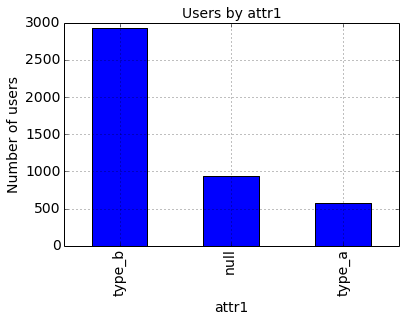

In [5]:
myplot = ds_test_demog_out["attr1"].value_counts().plot(kind='bar', fontsize = 14)
myplot.set_title("Users by attr1", fontsize = 14)
myplot.set_xlabel("attr1", fontsize = 14)
myplot.set_ylabel("Number of users", fontsize = 14)

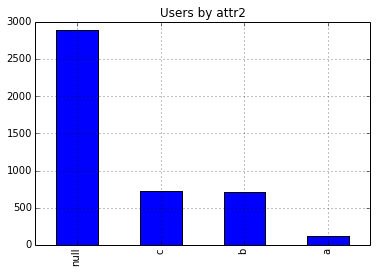

In [6]:
ds_test_demog_out["attr2"].value_counts().plot(kind='bar', title = "Users by attr2")

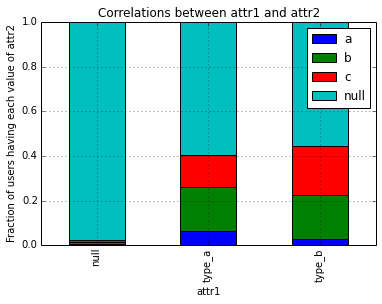

In [7]:
test = ds_test_demog_out.copy()
test = test.groupby(['attr1', 'attr2']).size().reset_index()
test = test.pivot(index='attr1', columns='attr2', values = 0).reset_index()
test['total'] = test['a'] + test['b'] + test['c'] + test['null']
test[['a', 'b', 'c', 'null']] = test[['a', 'b', 'c', 'null']].astype(float)
test['a'] /= test['total']
test['b'] /= test['total']
test['c'] /= test['total']
test['null'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
myplot = test.plot(kind='bar', stacked = True, x = 'attr1', title = "Correlations between attr1 and attr2")
myplot.set_xlabel("attr1")
myplot.set_ylabel("Fraction of users having each value of attr2")
myplot.legend(framealpha=1)

In [8]:
ds_test_demog_out_plus_features = ds_test_demog_out.copy()
ds_test_demog_out_plus_features.shape

(4450, 3)

##Loading and exploring the ds_test_log_out table

In [9]:
ds_test_log_out = pd.read_table("ds_test_log_out.csv", sep = ',', encoding = 'utf-8')
ds_test_log_out.shape

(439337, 6)

In [10]:
ds_test_log_out.head()

,uid,DT,dvc_type,geo_code,section_code,views
0,AAA-3045,2014-03-12,desktp,geo_59,section_27,1
1,AAA-1198,2014-03-24,desktp,geo_59,section_27,1
2,AAA-5734,2014-03-26,desktp,geo_59,section_27,1
3,AAA-4008,2014-03-13,desktp,geo_59,section_27,1
4,AAA-4008,2014-03-12,desktp,geo_59,section_27,3


In [11]:
ds_test_log_out.describe()

,views
count,439307.000000
mean,7.909985
std,19.031831
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1192.000000


In [12]:
len(ds_test_log_out['uid'].unique())

4560

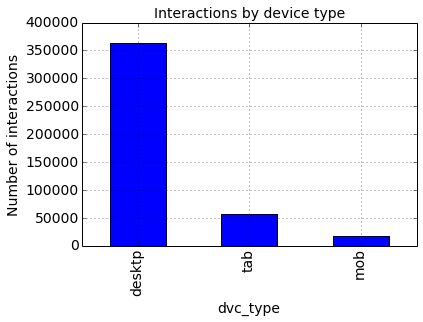

In [13]:
myplot = ds_test_log_out["dvc_type"].value_counts().plot(kind='bar', fontsize = 14)
myplot.set_title("Interactions by device type", fontsize = 14)
myplot.set_xlabel("dvc_type", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

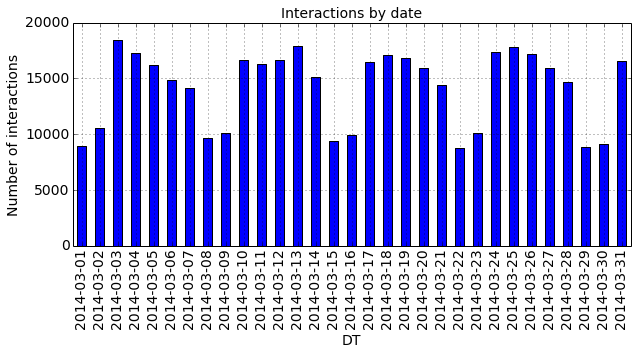

In [14]:
myplot = ds_test_log_out["DT"].value_counts().sort_index().plot(kind='bar', fontsize = 14, figsize = (10, 4))
myplot.set_title("Interactions by date", fontsize = 14)
myplot.set_xlabel("DT", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

In [15]:
Mondays = ['2014-03-03', '2014-03-10', '2014-03-17', '2014-03-24', '2014-03-31']
Tuesdays = ['2014-03-04', '2014-03-11', '2014-03-18', '2014-03-25']
Wednesdays = ['2014-03-05', '2014-03-12', '2014-03-19', '2014-03-26']
Thursdays = ['2014-03-06', '2014-03-13', '2014-03-20', '2014-03-27']
Fridays = ['2014-03-07', '2014-03-14', '2014-03-21', '2014-03-28']
Saturdays = ['2014-03-01', '2014-03-08', '2014-03-15', '2014-03-22', '2014-03-29'] 
Sundays = ['2014-03-02', '2014-03-09', '2014-03-16', '2014-03-23', '2014-03-30']
weekend_days = Saturdays + Sundays
weekdays = Mondays + Tuesdays + Wednesdays + Thursdays + Fridays



week1 = ['2014-03-01', '2014-03-02', '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07']
week2 = ['2014-03-08', '2014-03-09', '2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13', '2014-03-14']
week3 = ['2014-03-15', '2014-03-16', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20', '2014-03-21']
week4 = ['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28']
week5 = ['2014-03-29', '2014-03-30', '2014-03-31']

DT = week1 + week2 + week3 + week4 + week5
weeks = ['week1', 'week1', 'week1', 'week1', 'week1', 'week1', 'week1', 
         'week2', 'week2', 'week2', 'week2', 'week2', 'week2', 'week2',
         'week3', 'week3', 'week3', 'week3', 'week3', 'week3', 'week3',
         'week4', 'week4', 'week4', 'week4', 'week4', 'week4', 'week4',
         'week5', 'week5', 'week5']
daynames = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Saturday', 'Sunday', 'Monday']

weekdf = pd.DataFrame()
weekdf['DT'] = np.array(DT)
weekdf['week'] = np.array(weeks)

daynamedf = pd.DataFrame()
daynamedf['DT'] = np.array(DT)
daynamedf['dayname'] = np.array(daynames)

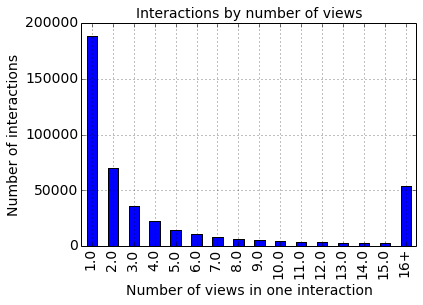

In [16]:
temp = []
for i in ds_test_log_out["views"]:
    if i >= 16:
        temp.append('16+')
    else:
        temp.append(i)
myplot = pd.Series(temp).value_counts().sort_index().plot(kind='bar', fontsize = 14)
myplot.set_title("Interactions by number of views", fontsize = 14)
myplot.set_xlabel("Number of views in one interaction", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

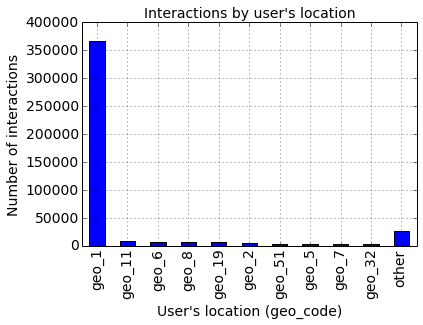

In [17]:
largest = ['geo_1', 'geo_11', 'geo_6', 'geo_8', 'geo_19', 'geo_2', 'geo_51', 'geo_5', 'geo_7', 'geo_32']
temp = []
for i in ds_test_log_out["geo_code"]:
    if i not in largest:
        temp.append('other')
    else:
        temp.append(i)

largest.append('other')        
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[largest].plot(kind='bar', fontsize = 14, legend = False)
myplot.set_title("Interactions by user's location", fontsize = 14)
myplot.set_xlabel("User's location (geo_code)", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

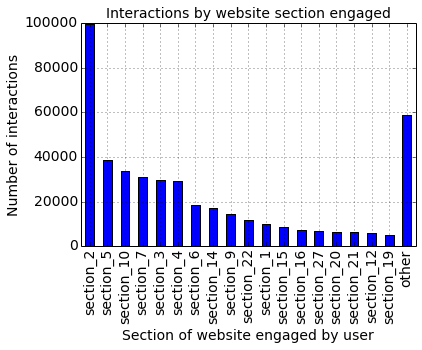

In [18]:
largest = ['section_2', 'section_5', 'section_10', 'section_7', 'section_3', 'section_4', 
'section_6', 'section_14', 'section_9', 'section_22', 'section_1', 'section_15',
'section_16', 'section_27', 'section_20', 'section_21', 'section_12', 'section_19']

temp = []
for i in ds_test_log_out["section_code"]:
    if i not in largest:
        temp.append('other')
    else:
        temp.append(i)

largest.append('other')        
temp_df = pd.DataFrame(pd.Series(temp).value_counts())
myplot = temp_df.ix[largest].plot(kind='bar', legend = False, fontsize = 14)
myplot.set_title("Interactions by website section engaged", fontsize = 14)
myplot.set_xlabel("Section of website engaged by user", fontsize = 14)
myplot.set_ylabel("Number of interactions", fontsize = 14)

##Merging the two tables and further exploring

In [19]:
mymerged = pd.merge(ds_test_log_out, ds_test_demog_out, how = "inner", on = "uid", sort = True)
mymerged.head()
mymerged.shape

(427671, 8)

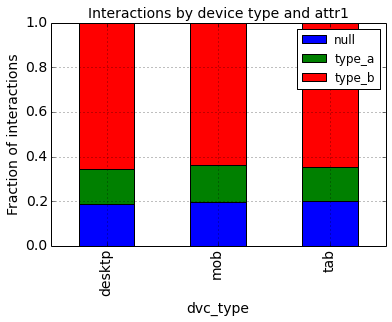

In [20]:
test = mymerged.copy()
test = test.groupby(['dvc_type', 'attr1']).size().reset_index()
test = test.pivot(index='dvc_type', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'dvc_type', fontsize = 14)
myplot.set_title("Interactions by device type and attr1", fontsize = 14)
myplot.set_xlabel("dvc_type", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

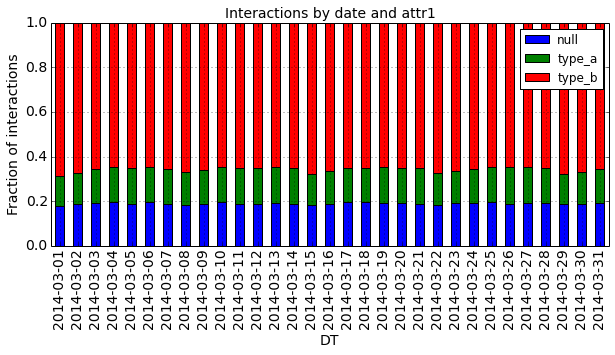

In [21]:
test = mymerged.copy()
test = test.groupby(['DT', 'attr1']).size().reset_index()
test = test.pivot(index='DT', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'DT', fontsize = 14, figsize = (10, 4))
myplot.set_title("Interactions by date and attr1", fontsize = 14)
myplot.set_xlabel("DT", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

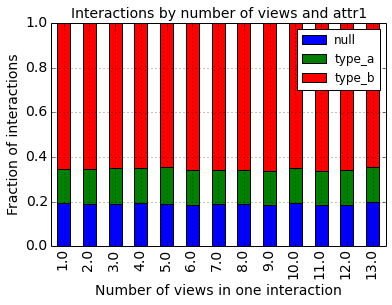

In [22]:
test = mymerged.copy()
test  = test.groupby(['views', 'attr1']).size().reset_index()
test = test.pivot(index='views', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 3000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'views', fontsize = 14)
myplot.set_title("Interactions by number of views and attr1", fontsize = 14)
myplot.set_xlabel("Number of views in one interaction", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

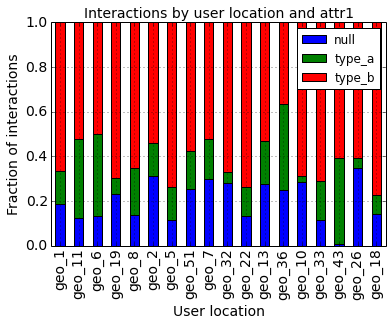

In [23]:
test = mymerged.copy()
test = test.groupby(['geo_code', 'attr1']).size().reset_index()
test = test.pivot(index='geo_code', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 1000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'geo_code', fontsize = 14)
myplot.set_title("Interactions by user location and attr1", fontsize = 14)
myplot.set_xlabel("User location", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

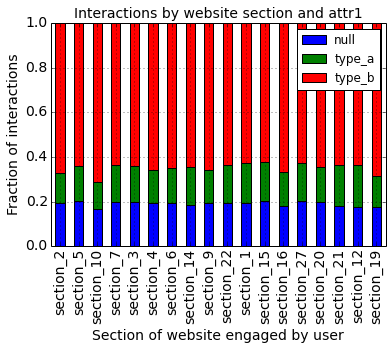

In [24]:
test = mymerged.copy()
test = test.groupby(['section_code', 'attr1']).size().reset_index()
test = test.pivot(index='section_code', columns='attr1', values = 0).reset_index()
test['total'] = test['null'] + test['type_a'] + test['type_b']
test = test[test.total > 5000].sort('total', ascending = False)
test[['null', 'type_a', 'type_b']] = test[['null', 'type_a', 'type_b']].astype(float)
test['null'] /= test['total']
test['type_a'] /= test['total']
test['type_b'] /= test['total']
test.drop(['total'], axis = 1, inplace = True)
#test.head()
myplot = test.plot(kind='bar', stacked = True, x = 'section_code', fontsize = 14)
myplot.set_title("Interactions by website section and attr1", fontsize = 14)
myplot.set_xlabel("Section of website engaged by user", fontsize = 14)
myplot.set_ylabel("Fraction of interactions", fontsize = 14)
myplot.legend(framealpha=1)

##Trying logistic regression: train on entire dataset

In [39]:
mytrain_features = mymerged.copy()
mytrain_features.dropna(inplace = True)
mytrain_features.views = pp.scale(mytrain_features.views)
categorical_features = ['DT', 'dvc_type', 'geo_code', 'section_code', 'attr2']
dummies = pd.get_dummies(mytrain_features[categorical_features])
mytrain_features = mytrain_features.join(dummies)

mytrain_features = mytrain_features[mytrain_features.attr1 != 'null']
mytrain_attr1 = mytrain_features.attr1
mytrain_features.drop(categorical_features, axis = 1, inplace = True)
mytrain_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

mytrain_features.shape

(346058, 358)

In [40]:
myLogit = Logit()
myLogit.fit(mytrain_features, mytrain_attr1)

print myLogit.score(mytrain_features, mytrain_attr1)
mytrain_attr1_predicted = myLogit.predict(mytrain_features)

0.814169879038


##Trying logistic regression: train on random portion of dataset, test on rest

In [41]:
demog_data = mymerged.copy()
demog_data.dropna(inplace = True)
demog_data.views = pp.scale(demog_data.views)
categorical_features = ['DT', 'dvc_type', 'geo_code', 'section_code', 'attr2']
dummies = pd.get_dummies(demog_data[categorical_features])
demog_data = demog_data.join(dummies)

demog_data.drop(categorical_features, axis = 1, inplace = True)
demog_data = demog_data[demog_data.attr1 != 'null']
random_rows = random.sample(demog_data.index, 280000)
demog_data_train = demog_data.ix[random_rows]
demog_data_test = demog_data.drop(random_rows)
print len(demog_data_train), len(demog_data_test)

280000 66058


In [42]:
demog_data_train_features = demog_data_train.copy()
demog_data_train_attr1 = demog_data_train_features.attr1
demog_data_train_uid = demog_data_train_features.uid
demog_data_train_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

myLogit = Logit()
myLogit.fit(demog_data_train_features, demog_data_train_attr1)

print myLogit.score(demog_data_train_features, demog_data_train_attr1)
demog_data_train_predicted = myLogit.predict(demog_data_train_features)

0.813592857143


In [43]:
demog_data_test_features = demog_data_test.copy()
demog_data_test_attr1 = demog_data_test_features.attr1
demog_data_test_uid = demog_data_test_features.uid
demog_data_test_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

print myLogit.score(demog_data_test_features, demog_data_test_attr1)
demog_data_test_predicted = myLogit.predict(demog_data_test_features)

0.816237246056


In [44]:
demog_data_test_uid = pd.DataFrame(demog_data_test_uid).join(demog_data_test_attr1)
demog_data_test_uid['predicted'] = demog_data_test_predicted
test = demog_data_test_uid.groupby(['uid', 'attr1']).first().reset_index()
test['correctly_predicted'] = (test['attr1'] == test['predicted'])
test = test.groupby(['attr1', 'correctly_predicted']).size()
test

attr1   correctly_predicted
type_a  False                   550
        True                     21
type_b  False                    10
        True                   2838
dtype: int64

##Trying logistic regression: throwing out type_b data from training set to balance classes

In [46]:
demog_data = mymerged.copy()
demog_data.dropna(inplace = True)
demog_data.views = pp.scale(demog_data.views)
categorical_features = ['DT', 'dvc_type', 'geo_code', 'section_code', 'attr2']
dummies = pd.get_dummies(demog_data[categorical_features])
demog_data = demog_data.join(dummies)

demog_data.drop(categorical_features, axis = 1, inplace = True)
demog_data = demog_data[demog_data.attr1 != 'null']
random_rows = random.sample(demog_data.index, 280000)
demog_data_train = demog_data.ix[random_rows]
demog_data_test = demog_data.drop(random_rows)

demog_data_train_b = demog_data_train[demog_data_train.attr1 == 'type_b']
random_b_rows = random.sample(demog_data_train_b.index, 150000)
demog_data_train = demog_data_train.drop(random_b_rows)
print len(demog_data_train_b), len(demog_data_train), len(demog_data_test)

226605 130000 66058


In [47]:
demog_data_train_features = demog_data_train.copy()
demog_data_train_attr1 = demog_data_train_features.attr1
demog_data_train_uid = demog_data_train_features.uid
demog_data_train_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

myLogit = Logit()
myLogit.fit(demog_data_train_features, demog_data_train_attr1)

print myLogit.score(demog_data_train_features, demog_data_train_attr1)
demog_data_train_predicted = myLogit.predict(demog_data_train_features)

0.629930769231


In [48]:
demog_data_test_features = demog_data_test.copy()
demog_data_test_attr1 = demog_data_test_features.attr1
demog_data_test_uid = demog_data_test_features.uid
demog_data_test_features.drop(['attr1', 'uid'], axis = 1, inplace = True)

print myLogit.score(demog_data_test_features, demog_data_test_attr1)
demog_data_test_predicted = myLogit.predict(demog_data_test_features)

0.783296497018


In [49]:
demog_data_test_uid = pd.DataFrame(demog_data_test_uid).join(demog_data_test_attr1)
demog_data_test_uid['predicted'] = demog_data_test_predicted
test = demog_data_test_uid.groupby(['uid', 'attr1']).first().reset_index()
test['correctly_predicted'] = (test['attr1'] == test['predicted'])
test = test.groupby(['attr1', 'correctly_predicted']).size()
test

attr1   correctly_predicted
type_a  False                   455
        True                    116
type_b  False                   253
        True                   2602
dtype: int64

##Predicting attr1 for null-valued users using already-trained classifier

In [51]:
null_data = mymerged.copy()
null_data.dropna(inplace = True)
null_data.views = pp.scale(null_data.views)
categorical_features = ['DT', 'dvc_type', 'geo_code', 'section_code', 'attr2']
dummies = pd.get_dummies(null_data[categorical_features])
null_data = null_data.join(dummies)

null_data = null_data[null_data.attr1 == 'null']
null_data.drop(categorical_features, axis = 1, inplace = True)
null_data_uid = null_data.uid
null_data.drop(['attr1', 'uid'], axis = 1, inplace = True)

null_data_predicted = myLogit.predict(null_data)

In [52]:
a_count = len(null_data_predicted[null_data_predicted == 'type_a'])
b_count = len(null_data_predicted[null_data_predicted == 'type_b'])
print "fraction type_a = ", float(a_count)/(a_count + b_count)
print "fraction type_b = ", float(b_count)/(a_count + b_count)

fraction type_a =  0.111345361836
fraction type_b =  0.888654638164
